In [22]:
# import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

# import libraries from tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Load the data

signal_data_df = pd.read_csv('signal.csv')

# Data analysis and visualisation

In [20]:
# Check the shape

signal_data_df.shape

(1599, 12)

In [6]:
# Check if there are null values

signal_data_df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [7]:
# Check column types

signal_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Check the dispersion / distribution of data around mean

signal_data_df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


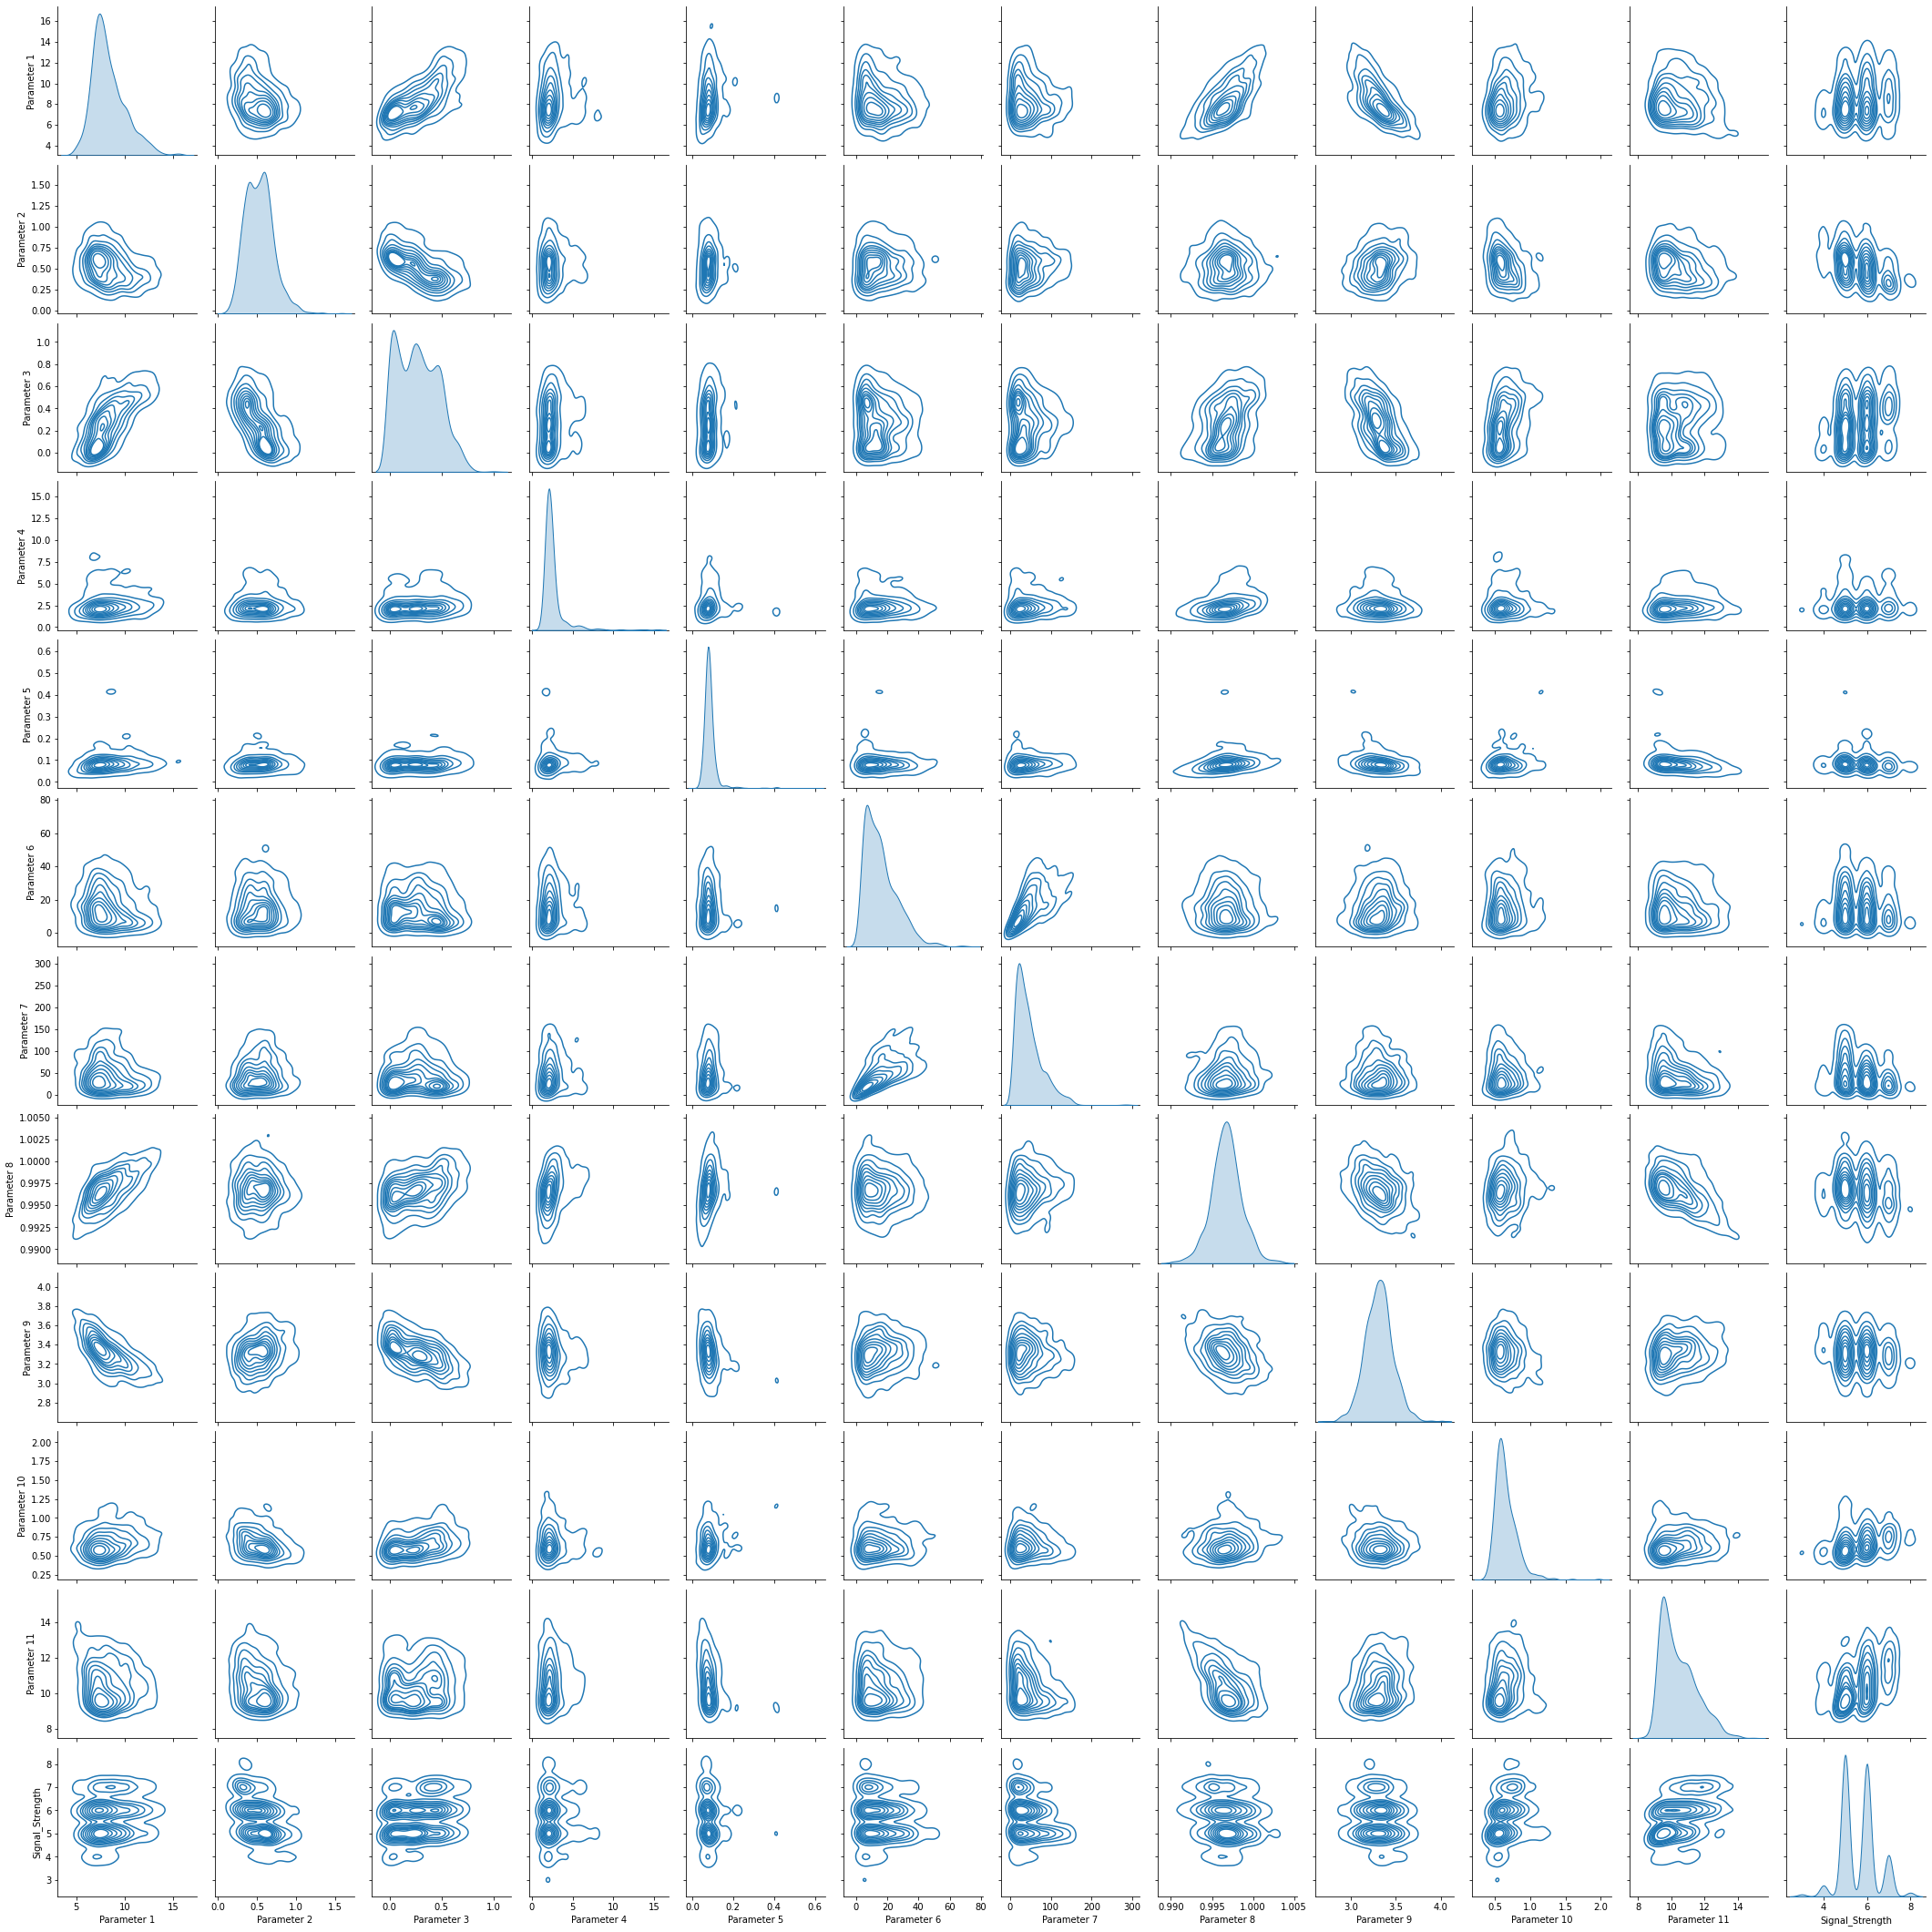

In [21]:
# Multivariate analysis using pairplot

sns.pairplot(signal_data_df, kind="kde") # No linear relationship seen below, all are complex non-linear surfaces

# Univariate Analysis

<AxesSubplot:xlabel='Parameter 1', ylabel='Density'>

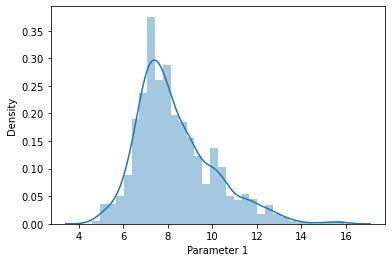

In [7]:
sns.distplot(signal_data_df["Parameter 1"])

<AxesSubplot:xlabel='Parameter 2', ylabel='Density'>

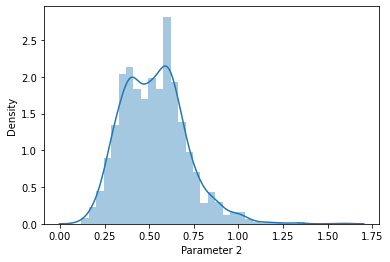

In [51]:
sns.distplot(signal_data_df["Parameter 2"])

<AxesSubplot:xlabel='Parameter 3', ylabel='Density'>

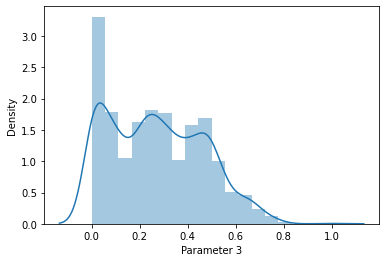

In [10]:
sns.distplot(signal_data_df["Parameter 3"])

<AxesSubplot:xlabel='Parameter 4', ylabel='Density'>

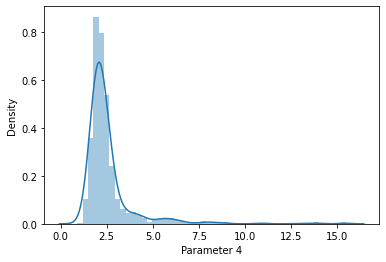

In [11]:
sns.distplot(signal_data_df["Parameter 4"])

<AxesSubplot:xlabel='Parameter 5', ylabel='Density'>

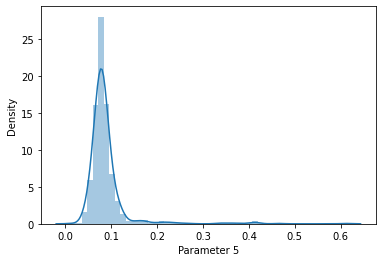

In [12]:
sns.distplot(signal_data_df["Parameter 5"])

<AxesSubplot:xlabel='Parameter 6', ylabel='Density'>

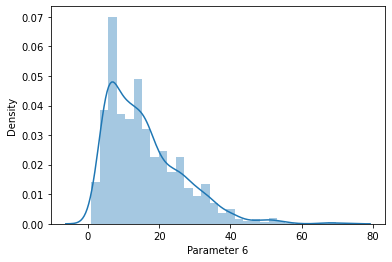

In [13]:
sns.distplot(signal_data_df["Parameter 6"])

<AxesSubplot:xlabel='Parameter 7', ylabel='Density'>

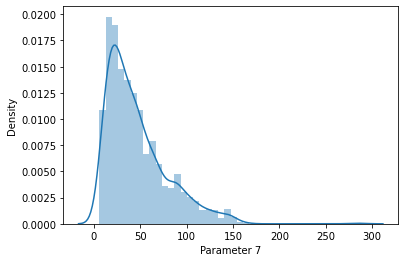

In [14]:
sns.distplot(signal_data_df["Parameter 7"])

<AxesSubplot:xlabel='Parameter 8', ylabel='Density'>

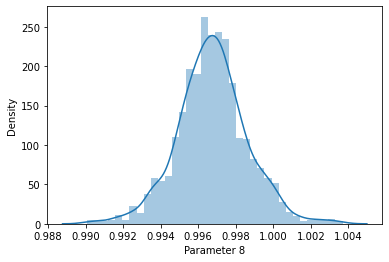

In [15]:
sns.distplot(signal_data_df["Parameter 8"])

<AxesSubplot:xlabel='Parameter 9', ylabel='Density'>

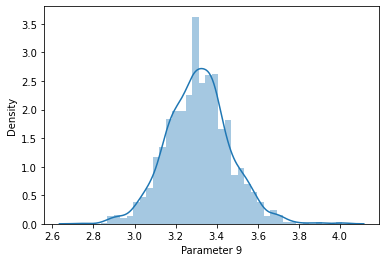

In [16]:
sns.distplot(signal_data_df["Parameter 9"])

<AxesSubplot:xlabel='Parameter 10', ylabel='Density'>

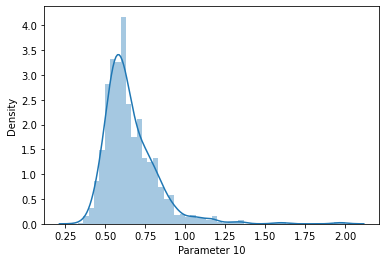

In [17]:
sns.distplot(signal_data_df["Parameter 10"])

<AxesSubplot:xlabel='Parameter 11', ylabel='Density'>

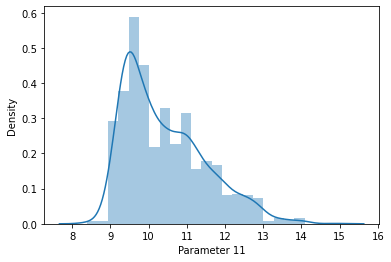

In [318]:
sns.distplot(signal_data_df["Parameter 11"])

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

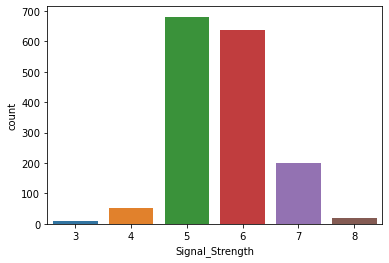

In [8]:
sns.countplot(signal_data_df["Signal_Strength"])

# Bivariate Analysis

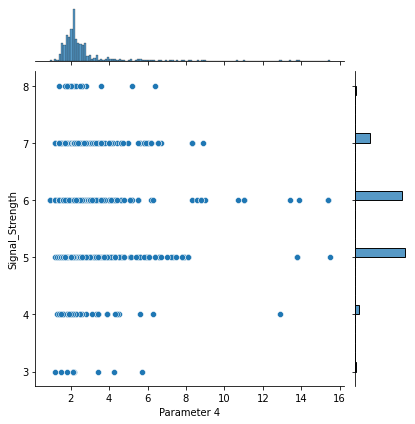

In [332]:
sns.jointplot(data = signal_data_df, x="Parameter 1", y="Signal_Strength")

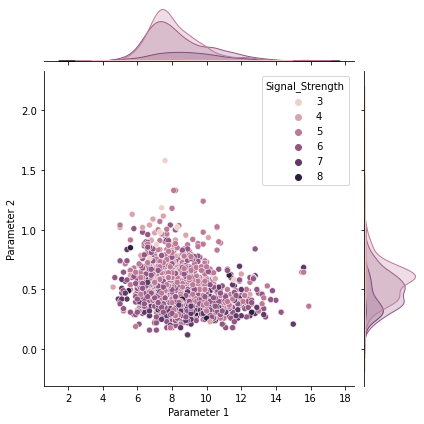

In [345]:
sns.jointplot(data = signal_data_df, x="Parameter 1", y="Parameter 2", hue="Signal_Strength")

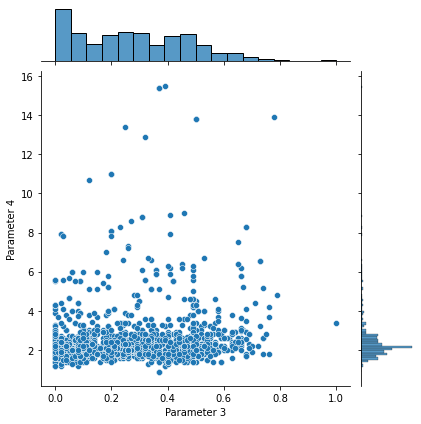

In [334]:
sns.jointplot(data = signal_data_df, x="Parameter 3", y="Parameter 4")

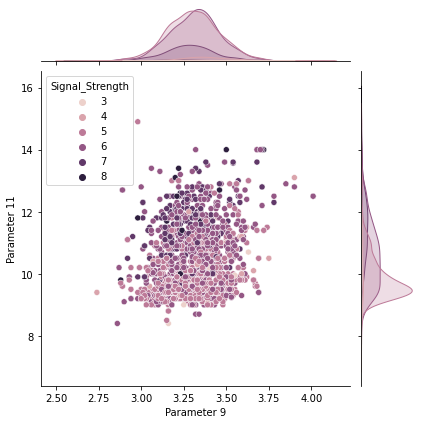

In [344]:
sns.jointplot(data = signal_data_df, x="Parameter 9", y="Parameter 11", hue="Signal_Strength")

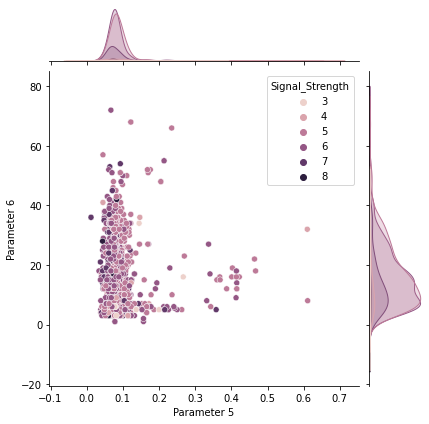

In [343]:
sns.jointplot(data = signal_data_df, x="Parameter 5", y="Parameter 6", hue="Signal_Strength")

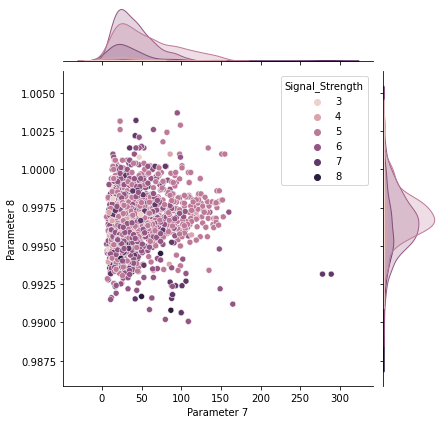

In [341]:
sns.jointplot(data = signal_data_df, x="Parameter 7", y="Parameter 8", hue="Signal_Strength")

# Neural network regressor function

In [24]:
def neural_network_regressor (n): # n is the row for which the signal_strength has to be predicted
    
    # load the data
    
    signal_data_df = pd.read_csv('signal.csv')
    reg_y = signal_data_df.pop('Signal_Strength')
    reg_X = signal_data_df
    
    reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_X, reg_y, test_size=0.25, random_state=12)
   
    # initialize the session
    
    tf.keras.backend.clear_session()

    # Initializing the regression sequential model
    
    global regression_model # to ensure this model is available in other functions in the notebook
    
    regression_model = tf.keras.Sequential()

    # Add input layer
    regression_model.add(tf.keras.layers.Dense(1, input_shape=(11,)))

    # Normalize the data
    regression_model.add(tf.keras.layers.BatchNormalization())

    # Add 1st hidden layer
    regression_model.add(tf.keras.layers.Dense(100, activation='relu'))

    # Add 2nd hidden layer
    regression_model.add(tf.keras.layers.Dense(50, activation='relu'))

    # Add output layer
    regression_model.add(tf.keras.layers.Dense(1))
    
    # Compile the model
    regression_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    # Fit the model
    regression_model.fit(reg_X_train, reg_y_train, epochs=50, verbose=0, batch_size = 32, validation_data=(reg_X_test, reg_y_test))
    
    # Evaluate the model
    reg_loss = regression_model.evaluate(reg_X_test, reg_y_test)
    
    # return the signal_strength
    return regression_model.predict(reg_X_test)[n]

# Neural Network Classifier function

In [25]:
def neural_network_classifier (n): # n is the row for which the signal_strength has to be predicted
    
    # load the data
    
    signal_data_df = pd.read_csv('signal.csv')
    class_y = signal_data_df.pop('Signal_Strength')
    class_X = signal_data_df
    
    # deduct 3 from all signal strength values to match the index positions in the output column
    
    for i in range(len(class_y)):
        class_y[i] = class_y[i] - 3
    classX_train, classX_test, classy_train, classy_test = train_test_split(class_X, class_y, test_size=0.25, random_state=12)
    
    # convert to categorical values
    
    classy_train = tf.keras.utils.to_categorical(classy_train, num_classes=6)
    classy_test = tf.keras.utils.to_categorical(classy_test, num_classes=6)
    
    # initialize the session
    
    tf.keras.backend.clear_session()

    # Initializing the classification sequential model
    
    global class_model # to ensure this model is available in other functions in the notebook
    
    class_model = tf.keras.Sequential()

    #input layer
    class_model.add(tf.keras.Input(shape=(11,)))

    # Normalize the data
    class_model.add(tf.keras.layers.BatchNormalization())

    #Add 1st hidden layer
    class_model.add(tf.keras.layers.Dense(100, activation='relu'))

    #Add 2nd hidden layer
    class_model.add(tf.keras.layers.Dense(50, activation='relu'))

    #output layer
    class_model.add(tf.keras.layers.Dense(6, activation='softmax'))
    
    # compile the model
    class_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')
    
    # fit the model
    class_model.fit(classX_train, classy_train, epochs=100, verbose=0, validation_data=(classX_test, classy_test))
    
    # model evaluation
    class_loss = class_model.evaluate(classX_test, classy_test)
    
    # add 3 as it was deducted from all signal strength values to match the index positions in the output column
    # and return signal strength
    
    return (class_model.predict(classX_test)[n]).argmax() + 3

# Neural Network GUI using tkinter python package

In [26]:
# import necessary libraries

import tkinter as tk
from tkinter import ttk

window = tk.Tk()
window.title("Neural Network Project GUI")

# Step 1 label

label = ttk.Label(window, text="Step 1: File Name")
label.grid(row=0, column = 0, sticky=tk.W)

# Step 1 textbox

file_name = tk.StringVar()
file_name_textBox = ttk.Entry(window, width=16, textvariable = file_name)
file_name_textBox.grid(row=0, column=1)

# Import data function

def import_data():
    global FN
    fn = file_name.get()
    FN = pd.read_csv(fn)
    
    confirm = "Data Imported"
    conf_entrybox = ttk.Entry(window, width=16)
    conf_entrybox.grid(row=0, column=3)
    conf_entrybox.insert(1,str(confirm))

# Import data button

fn_button = ttk.Button(window, text ="Import Data", command = import_data)
fn_button.grid(row=0, column=2)

# Step 2 label

label = ttk.Label(window, text="Step 2: Target Column")
label.grid(row=1, column = 0, sticky=tk.W)

# Step 2 textbox

sig_str = tk.StringVar()
sig_str_textBox = ttk.Entry(window, width=16, textvariable = sig_str)
sig_str_textBox.grid(row=1, column=1)

# Import Target column function

def import_target_column():
    ss = sig_str.get()
    
    if ss in FN.columns:
        confirm = "Found"
    else:
        confirm = "Not Found"
        
    conf_entrybox = ttk.Entry(window, width=16)
    conf_entrybox.grid(row=1, column=3)
    conf_entrybox.insert(1,str(confirm))

# Button to invoke the execution of import_target_column function

target_col_button = ttk.Button(window, text ="Import Target", command = import_target_column)
target_col_button.grid(row=1, column=2)

# Step 3 label

label = ttk.Label(window, text="Step 3: Neural Network Regressor")
label.grid(row=2, column = 0, sticky=tk.W)

# Rgression label

label = ttk.Label(window, text="Regression")
label.grid(row=3, column = 0, sticky=tk.E)

# Function to call the execution of neural network regressor and confirm its success

def nnreg_train():
    neural_network_regressor(0)
    
    confirm = "Network Trained"
    conf_entrybox = ttk.Entry(window, width=16)
    conf_entrybox.grid(row=3, column=2)
    conf_entrybox.insert(1,str(confirm))

# Button to invoke neural network regressor model

nnreg_trained_button = ttk.Button(window, text ="Train", command = nnreg_train)
nnreg_trained_button.grid(row=3, column=1)

# Pickle label for regressor model

label = ttk.Label(window, text="Pickle")
label.grid(row=4, column = 0, sticky=tk.E)

# function to pickle / save regressor model

def nnreg_pickle():
    regression_model.save("NNRegModel.h5")
    
    confirm = "Saved Model to disk"
    conf_entrybox = ttk.Entry(window, width=24)
    conf_entrybox.grid(row=4, column=2)
    conf_entrybox.insert(1,str(confirm))

# Button to save neural network regressor model

pickle_button = ttk.Button(window, text ="Run", command = nnreg_pickle)
pickle_button.grid(row=4, column=1)

# Step 4 label

label = ttk.Label(window, text="Step 4: Neural Network Classifier")
label.grid(row=5, column = 0, sticky=tk.W)

label = ttk.Label(window, text="Classifier")
label.grid(row=6, column = 0, sticky=tk.E)

# Function to call the execution of neural network classifier and confirm its success

def nnclass_train():
    neural_network_classifier(0)
    
    confirm = "Network Trained"
    conf_entrybox = ttk.Entry(window, width=16)
    conf_entrybox.grid(row=6, column=2)
    conf_entrybox.insert(1,str(confirm))

# Button to invoke neural network classifier model

nnreg_trained_button = ttk.Button(window, text ="Train", command = nnclass_train)
nnreg_trained_button.grid(row=6, column=1)

# Pickle label for classifier model

label = ttk.Label(window, text="Pickle")
label.grid(row=7, column = 0, sticky=tk.E)

# function to pickle / save classifier model

def nnclass_pickle():
    class_model.save("NNClassModel.h5")
    
    confirm = "Saved Model to disk"
    conf_entrybox = ttk.Entry(window, width=24)
    conf_entrybox.grid(row=7, column=2)
    conf_entrybox.insert(1,str(confirm))

# Button to save neural network classifier model

pickle_button = ttk.Button(window, text ="Run", command = nnclass_pickle)
pickle_button.grid(row=7, column=1)

window.mainloop()

13/13 [==============================] - 0s 1ms/step - loss: 0.5073
